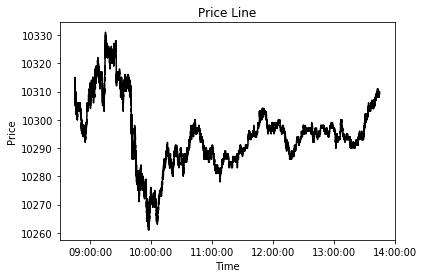

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#取得成交資訊
#strip('\n')是刪除空格, split(",")是以逗號分隔數據
#line 即excel中的列(數字的那個，不是A~Z的那個) 
#[1:]是從第1行讀到底
I020 = [ line.strip('\n').split(",") for line in open('Futures_20170815_I020.csv')][1:]
#IF print(I020)=> 會得到[['8450010', '8450009', 'TXFH7', '128', '10310', '732', '732', '202', '349'], ['8450011', '8450010', 'TXFH7', '128', '10309', '4', '736', '206', '350'], ['8450011', '8450010', 'TXFH7', '128', '10309', '1', '737', '207', '351'], ['8450011', '8450010', 'TXFH7', '128', '10310', '1', '738', '208', '352'],...]

#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020 ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ int(line[4]) for line in I020 ]

#定義圖表物件
ax = plt.figure(1) 		#第一張圖片              
ax = plt.subplot(111)	#該張圖片僅一個圖案
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#定義title
plt.title('Price Line')
plt.xlabel('Time')
plt.ylabel('Price')

#繪製圖案
#plot_date(X軸物件, Y軸物件, 線風格)
ax.plot_date(Time1, Price, 'k-')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

#顯示繪製圖表
plt.show()

print(I020)